In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
from scipy.optimize import curve_fit
import markdown
import sys
sys.path.append('/Users/vs/Dropbox/Python')
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
import seaborn as sns
import os
import glob
import linecache
import gloess_fits as gf
import re
from IPython.display import Image
import itertools
import reddening_laws as red
from astropy.stats import sigma_clip
import scipy.optimize as op
import emcee
import corner
from matplotlib.ticker import MaxNLocator
from astroquery.irsa_dust import IrsaDust
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap





bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
mp.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [3]:
path = '/Users/vs/Dropbox/Gaia/'
os.chdir(path)

In [4]:
gaia_df = pd.read_csv('vizer_crossmatch.tsv', skiprows=166, skipinitialspace=True, names=('input', 'rad', 'HIP', 'TYC2', 'SolID', 'Source', 'RandomI', 'Epoch', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NgAC', 'NbAL', 'NbAC', 'DQ', 'epsi', 'sepsi', 'APF', 'ARF', 'WAL', 'WAC', 'Apr', 'MatchObs', 'Dup', 'sK1', 'sK2', 'sK3', 'sK4', 'mK1', 'mK2', 'mK3', 'mK4', 'o_<Gmag>', '<FG>', 'e_<FG>', '<Gmag>', 'Var', 'GLON', 'GLAT', 'ELON', 'ELAT'), na_values='NOT_AVAILABLE', sep=';', comment='#')
gaia_df['ID'] = gaia_df.input.str.split('\t',0).str.get(0)

gaia_df = gaia_df.drop('input', 1)
#gaia_df = gaia_df.drop('rad', 1)
gaia_df = gaia_df.replace('', np.nan)
gaia_df['ID'] = gaia_df['ID'].replace(regex=True, to_replace=r' ',value='_')
gaia_df['id_compare'] = map(str.lower, gaia_df.ID)
gaia_df['id_compare'] = gaia_df['id_compare'].replace(regex=True, to_replace=r'_',value='')

gaia_df column descriptions:
----
*   rad --- distance from input position
*	HIP	(I6)	? Hipparcos identifier (\original{hip}) [NULL integer written as an empty string]	[ucd=meta.id.cross]
*	TYC2	(A12)	Tycho 2 identifier (\original{tycho2_id})	[ucd=meta.id.cross]
*	SolID	(I19)	Solution ID (solution_id) (G1)	[ucd=meta.id;meta.version]
*	Source	(I19)	Source ID (source_id) (G2)	[ucd=meta.id;meta.main]
*	RandomI	(I7)	Random index used to select subsets (random_index) (G3)	[ucd=meta.code]
*	Epoch	(F6.1)	[2015.0] Reference epoch in Julian years (ref_epoch) (G4)	[ucd=meta.ref;time.epoch]
*	RA_ICRS	(F14.10)	Right ascension (ICRS) at epoch 2015.0 (ra)	[ucd=pos.eq.ra;meta.main]
*	e_RA_ICRS	(F6.3)	Standard error of right ascension (\original{ra_error})	[ucd=stat.error;pos.eq.ra]
*	DE_ICRS	(F14.10)	Declination (ICRS) at epoch 2015.0 (\original{dec})	[ucd=pos.eq.dec;meta.main]
*	e_DE_ICRS	(F6.3)	Standard error of declination (\original{dec_error})	[ucd=stat.error;pos.eq.dec]
*	Plx	(F6.2)	Absolute barycentric stellar parallax of the source at the reference epoch Epoch (\original{parallax})	[ucd=pos.parallax]
*	e_Plx	(F5.2)	Standard error of parallax (\original{parallax_error})	[ucd=stat.error;pos.parallax]
*	pmRA	(F9.3)	Proper motion in right ascension direction (pmRA) (G5)	[ucd=pos.pm;pos.eq.ra]
*	e_pmRA	(F6.3)	Standard error of proper motion in right ascension direction (\original{pmra_error})	[ucd=stat.error;pos.pm;pos.eq.ra]
*	pmDE	(F9.3)	Proper motion in declination direction (pmdec) (G6)	[ucd=pos.pm;pos.eq.dec]
*	e_pmDE	(F6.3)	Standard error of proper motion in declination direction (\original{pmdec_error})	[ucd=stat.error;pos.pm;pos.eq.dec]
*	RADEcor	(F6.3)	Correlation between right ascension and declination (\original{ra_dec_corr})	[ucd=stat.correlation]
*	RAPlxcor	(F6.3)	Correlation between right ascension and parallax (\original{ra_parallax_corr})	[ucd=stat.correlation]
*	RApmRAcor	(F6.3)	Correlation between right ascension and proper motion in right ascension (\original{ra_pmra_corr})	[ucd=stat.correlation]
*	RApmDEcor	(F6.3)	Correlation between right ascension and proper motion in declination (\original{ra_pmdec_corr})	[ucd=stat.correlation]
*	DEPlxcor	(F6.3)	Correlation between declination and parallax (\original{dec_parallax_corr})	[ucd=stat.correlation]
*	DEpmRAcor	(F6.3)	Correlation between declination and proper motion in right ascension (\original{dec_pmra_corr})	[ucd=stat.correlation]
*	DEpmDEcor	(F6.3)	Correlation between declination and proper motion in declination (\original{dec_pmdec_corr})	[ucd=stat.correlation]
*	PlxpmRAcor	(F6.3)	Correlation between parallax and proper motion in right ascension (\original{parallax_pmra_corr})	[ucd=stat.correlation]
*	PlxpmDEcor	(F6.3)	Correlation between parallax and proper motion in declination (\original{parallax_pmdec_corr})	[ucd=stat.correlation]
*	pmRApmDEcor	(F6.3)	Correlation between proper motion in right ascension and proper motion in declination (\original{pmra_pmdec_corr})	[ucd=stat.correlation]
*	NAL	(I4)	Total number of observations AL (astrometric_n_obs_al) (G7)	[ucd=meta.number]
*	NAC	(I4)	Total number of observations AC (astrometric_n_obs_ac) (G8)	[ucd=meta.number]
*	NgAL	(I4)	Number of good observations AL (astrometric_n_good_obs_al) (G9)	[ucd=meta.number]
*	NgAC	(I4)	Number of good observations AC (astrometric_n_good_obs_ac) (G9)	[ucd=meta.number]
*	NbAL	(I2)	Number of bad observations AL (\original{astrometric_n_bad_obs_al}) (G10)	[ucd=meta.number]
*	NbAC	(I3)	Number of bad observations AC (\original{astrometric_n_bad_obs_ac}) (G10)	[ucd=meta.number]
*	DQ	(F8.2)	? Hipparcos/Gaia data discrepancy (Hipparcos subset of TGAS only) (\original{astrometric_delta_q}) (G11)	[ucd=stat.value]
*	epsi	(F5.2)	Excess noise of the source (\original{astrometric_excess_noise}) (G12)	[ucd=stat.value]
*	sepsi	(E8.1)	Significance of excess noise (\original{astrometric_excess_noise_sig}) (G13)	[ucd=stat.value]
*	APF	(I1)	[1] Primary or secondary (\original{astrometric_primary_flag}) (G14)	[ucd=meta.code]
*	ARF	(F6.2)	Relegation factor (\original{astrometric_relegation_factor})	[ucd=arith.factor]
*	WAL	(F7.3)	Mean astrometric weight of the source in the AL direction (\original{astrometric_weight_al})	[ucd=stat.weight;stat.mean]
*	WAC	(E9.2)	? Mean astrometric weight of the source in the AC direction (\original{astrometric_weight_ac})	[ucd=stat.weight;stat.mean]
*	Apr	(I1)	[3/5] Type of prior used in in the astrometric solution (\original{astrometric_priors_used}) (G15)	[ucd=meta.code]
*	MatchObs	(I3)	Amount of observations matched to this source (\original{matched_observations}) (G16)	[ucd=meta.number]
*	Dup	(I1)	[0/1] Source with duplicate sources (\original{duplicated_source}) (G17)	[ucd=meta.code]
*	sK1	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k1}) (G18)	[ucd=meta.code]
*	sK2	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k2}) (G18)	[ucd=meta.code]
*	sK3	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k3}) (G18)	[ucd=meta.code]
*	sK4	(F6.3)	[0/1] Degree of concentration of scan directions across the source (\original{scan_direction_strength_k4}) (G18)	[ucd=meta.code]
*	mK1	(F13.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k1}) (G19)	[ucd=meta.code]
*	mK2	(F12.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k2}) (G19)	[ucd=meta.code]
*	mK3	(F12.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k3}) (G19)	[ucd=meta.code]
*	mK4	(F12.8)	Mean position angle of scan directions across the source (\original{scan_direction_mean_k4}) (G19)	[ucd=meta.code]
*	o_<Gmag>	(I4)	Number of observations contributing to G photometry (\original{phot_g_n_obs})	[ucd=meta.number]
*	<FG>	(F15.5)	G-band mean flux (\original{phot_g_mean_flux})	[ucd=phot.flux;stat.mean;em.opt]
*	e_<FG>	(F13.5)	Error on G-band mean flux (\original{phot_g_mean_flux_error})	[ucd=stat.error]
*	<Gmag>	(F6.3)	G-band mean magnitude (\original{phot_g_mean_mag}) (G20)	[ucd=phot.mag;stat.mean;em.opt]
*	Var	(A13)	Photometric variability flag (\original{phot_variable_flag}) (G21)	[ucd=meta.code;src.var]
*	GLON	(F14.10)	Galactic longitude at epoch 2015.0 (l)	[ucd=pos.galactic.lon]
*	GLAT	(F14.10)	Galactic latitude at epoch 2015.0 (b)	[ucd=pos.galactic.lat]
*	ELON	(F14.10)	Ecliptic longitude at epoch 2015.0 (\original{ecl_lon})	[ucd=pos.ecliptic.lon]
*	ELAT	(F14.10)	Ecliptic latitude at epoch 2015.0 (\original{ecl_lat})	[ucd=pos.ecliptic.lat]
*   ID -- RR Lyrae name
*   id_compare -- lowercase id for string comparison

In [5]:
info_df = pd.read_csv('rrl_average_mags', delim_whitespace=True)
info_df


,Name,Period,Type,id_compare,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5
0,ABUma,0.600,ab,abuma,9.598,0.003,0.171,9.587,0.003,0.177
1,AMTuc,0.406,c,amtuc,10.602,0.002,0.127,10.565,0.002,0.142
2,ANSer,0.522,ab,anser,9.801,0.004,0.289,9.795,0.004,0.299
3,APSer,0.341,c,apser,10.213,0.002,0.111,10.202,0.002,0.122
4,AVPeg,0.390,ab,avpeg,9.332,0.004,0.281,9.329,0.004,0.281
5,BHPeg,0.641,ab,bhpeg,9.002,0.003,0.237,8.982,0.003,0.236
6,BXLeo,0.363,c,bxleo,10.678,0.002,0.107,10.670,0.002,0.122
7,CSEri,0.311,c,cseri,8.126,0.002,0.117,8.110,0.002,0.117
8,CUCom,0.406,d,cucom,12.258,0.002,0.142,12.229,0.002,0.211
9,DHPeg,0.256,c,dhpeg,8.610,0.004,0.305,8.662,0.008,0.852


In [6]:
printcols = ['ID', 'rad']
gaia_df[printcols]
gaia_df = gaia_df.groupby(['ID']).min()
#gaia_df = gaia_df.reset_index(drop=True)

In [7]:
merged_df = info_df.merge(gaia_df, on='id_compare')
useful = ['Name', 'Period', 'Type', 'mag_3p6', 'err_3p6', 'amp_3p6', 'mag_4p5', 'err_4p5', 'amp_4p5', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'id_compare']
analysis_df = merged_df[useful]
analysis_df = analysis_df.reset_index(drop=True)
analysis_df

,Name,Period,Type,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5,RA_ICRS,DE_ICRS,Plx,e_Plx,id_compare
0,ABUma,0.600,ab,9.598,0.003,0.171,9.587,0.003,0.177,182.810685,47.828763,0.93,0.27,abuma
1,AMTuc,0.406,c,10.602,0.002,0.127,10.565,0.002,0.142,19.627973,-67.918161,0.85,0.26,amtuc
2,ANSer,0.522,ab,9.801,0.004,0.289,9.795,0.004,0.299,238.379390,12.961105,0.77,0.29,anser
3,AVPeg,0.390,ab,9.332,0.004,0.281,9.329,0.004,0.281,328.011708,22.574791,1.53,0.23,avpeg
4,BHPeg,0.641,ab,9.002,0.003,0.237,8.982,0.003,0.236,343.254215,15.787682,1.40,0.22,bhpeg
5,BXLeo,0.363,c,10.678,0.002,0.107,10.670,0.002,0.122,174.508478,16.543330,0.53,0.28,bxleo
6,CSEri,0.311,c,8.126,0.002,0.117,8.110,0.002,0.117,39.274539,-42.963311,2.16,0.23,cseri
7,DXDel,0.473,ab,8.653,0.004,0.249,8.641,0.004,0.258,311.868205,12.464108,1.66,0.22,dxdel
8,HKPup,0.734,ab,9.884,0.004,0.252,9.854,0.004,0.257,116.195095,-13.098978,0.53,0.26,hkpup
9,MTTel,0.317,c,8.078,0.002,0.126,8.064,0.002,0.111,285.550322,-46.653841,1.43,0.31,mttel


# PL fitting

* analysis_df dataframe contains the TGAS parallaxes, uncertainties, and positions, and the Spitzer mid-IR mags, errors and amplitudes of the 40 RRL in common between TGAS and CRRP. This is the table to use to do the calibration of the mid-IR PL relation.

## Reduced parallax uncertainties
* Parallax uncertainties are being reduced according to the formula in Gould, Kollmeier & Sesar (2016)


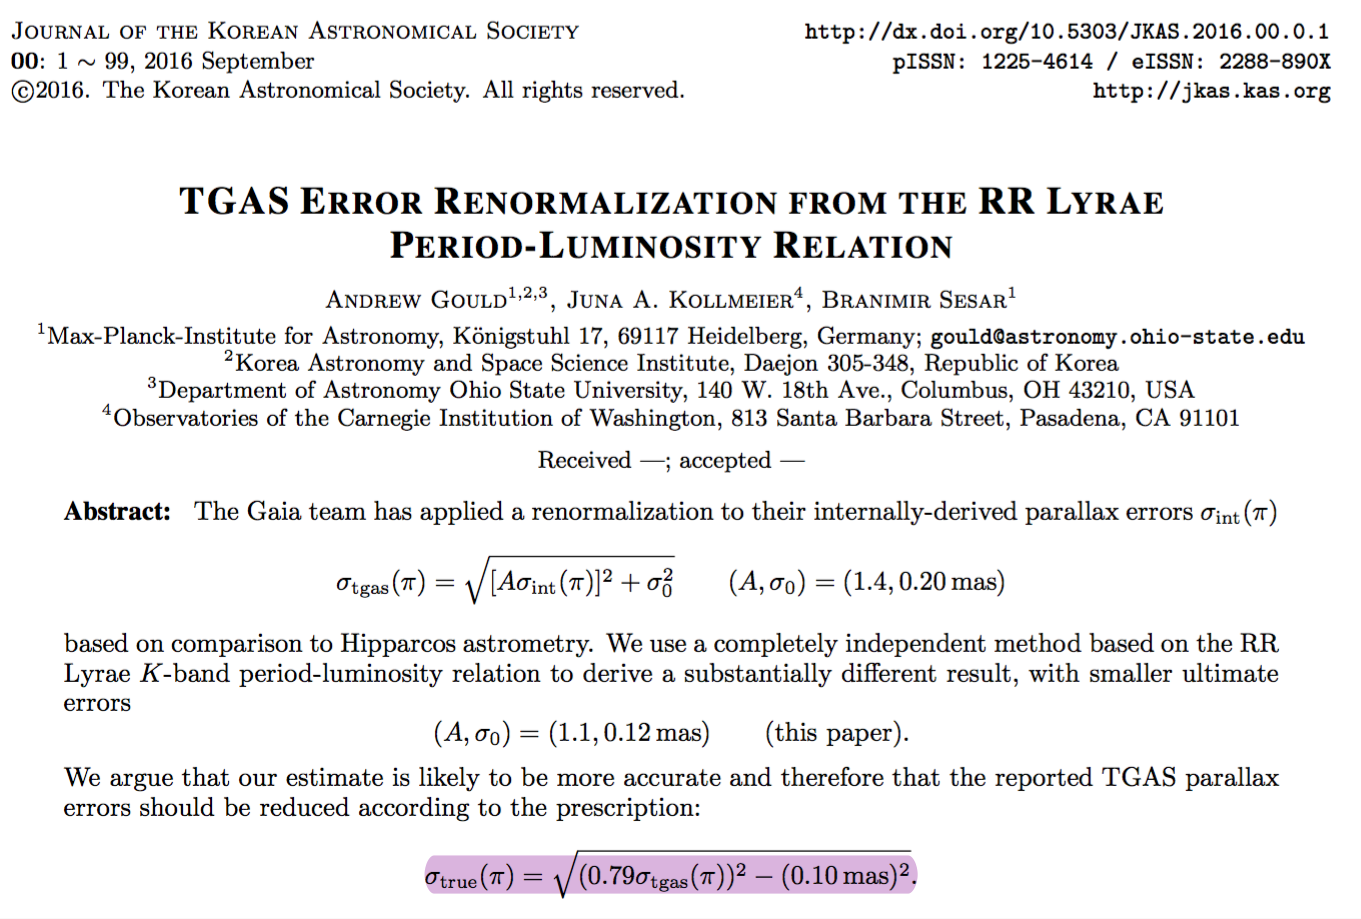

In [8]:
Image("gould_kollmeier_abstract.png")


In [9]:
analysis_df['e_gks'] = analysis_df.apply(lambda x : np.sqrt((0.79*x['e_Plx'])**2 - (0.10)**2), axis=1)

In [10]:
analysis_df

,Name,Period,Type,mag_3p6,err_3p6,amp_3p6,mag_4p5,err_4p5,amp_4p5,RA_ICRS,DE_ICRS,Plx,e_Plx,id_compare,e_gks
0,ABUma,0.600,ab,9.598,0.003,0.171,9.587,0.003,0.177,182.810685,47.828763,0.93,0.27,abuma,0.188406
1,AMTuc,0.406,c,10.602,0.002,0.127,10.565,0.002,0.142,19.627973,-67.918161,0.85,0.26,amtuc,0.179413
2,ANSer,0.522,ab,9.801,0.004,0.289,9.795,0.004,0.299,238.379390,12.961105,0.77,0.29,anser,0.206123
3,AVPeg,0.390,ab,9.332,0.004,0.281,9.329,0.004,0.281,328.011708,22.574791,1.53,0.23,avpeg,0.151707
4,BHPeg,0.641,ab,9.002,0.003,0.237,8.982,0.003,0.236,343.254215,15.787682,1.40,0.22,bhpeg,0.142149
5,BXLeo,0.363,c,10.678,0.002,0.107,10.670,0.002,0.122,174.508478,16.543330,0.53,0.28,bxleo,0.197305
6,CSEri,0.311,c,8.126,0.002,0.117,8.110,0.002,0.117,39.274539,-42.963311,2.16,0.23,cseri,0.151707
7,DXDel,0.473,ab,8.653,0.004,0.249,8.641,0.004,0.258,311.868205,12.464108,1.66,0.22,dxdel,0.142149
8,HKPup,0.734,ab,9.884,0.004,0.252,9.854,0.004,0.257,116.195095,-13.098978,0.53,0.26,hkpup,0.179413
9,MTTel,0.317,c,8.078,0.002,0.126,8.064,0.002,0.111,285.550322,-46.653841,1.43,0.31,mttel,0.223553


## Extinction

* Must correct for extinction to get correct absolute magnitudes

* Can correct for this using foreground dust maps

http://astroquery.readthedocs.io/en/latest/irsa/irsa_dust.html

* IRSA dust service provides both Schlegel, Finkbeiner & Davis (1998) and Schlafly & Finkbeiner (2011) results in the table. 

* I will adopt the S&F (2011) values for this work.

* Systematic uncertainties in their work approx 0.02 mag. Statistical on the order of millimag. Need to read the paper in more detail.

* For now adopting conservative value of 0.005 mag random uncertainty



In [11]:
def grab_extinction(row):
    star = row.Name
    ra = row.RA_ICRS
    dec = row.DE_ICRS
    coord_string = str(ra) + 'd ' +  str(dec) + 'd'
    C = coord.SkyCoord(coord_string, frame='fk5')
    table = IrsaDust.get_extinction_table(C)
    irac_1_sandf = table[19][3]
    irac_2_sandf = table[20][3]
    analysis_df.ix[analysis_df.Name==star, 'A_3p6'] = irac_1_sandf
    analysis_df.ix[analysis_df.Name==star, 'A_4p5'] = irac_2_sandf
    print star, irac_1_sandf, irac_2_sandf
    return(0)
    

In [79]:
analysis_df.apply(lambda line: grab_extinction(line), axis=1);

ABUma 0.005 0.004
AMTuc 0.004 0.004
ANSer 0.007 0.006
AVPeg 0.013 0.011
BHPeg 0.015 0.012
BXLeo 0.005 0.004
CSEri 0.004 0.003
DXDel 0.024 0.02
HKPup 0.064 0.053
MTTel 0.011 0.009
RRGem 0.012 0.01
RRLyr 0.018 0.015
RUPsc 0.008 0.007
RvCrB 0.008 0.006
RVUma 0.003 0.003
RXEri 0.012 0.01
RZCep 0.187 0.155
STBoo 0.004 0.003
STCVn 0.003 0.002
SUDra 0.002 0.001
SVEri 0.016 0.014
SVHya 0.015 0.013
SVScl 0.003 0.002
SWAnd 0.008 0.007
SWDra 0.003 0.002
SXUma 0.002 0.002
TTLyn 0.003 0.003
TUUma 0.004 0.003
TVBoo 0.002 0.001
TWHer 0.008 0.006
UUVir 0.003 0.003
UVOct 0.018 0.015
UYBoo 0.007 0.006
V440Sgr 0.017 0.014
VXHer 0.009 0.007
VInd 0.009 0.007
WYAnt 0.012 0.01
XZCyg 0.023 0.019
XAri 0.037 0.031
YZCap 0.012 0.01


### parallax to absolute magnitude conversion

Now convert the parallaxes into distances and start to look at the PL relations

* Not doing LKH correction
    * See notes from Andy on why LKH is inapporopriate for individual stars.
    
Convert parallaxes to distances

* pi is in mas
    
    $$ d = \frac{1}{(\pi \times 10^{-3})} $$
* d is in pc
    
    $$ \frac{\sigma_{d}}{d} = \frac{\sigma_{\pi}}{\pi} $$
    
    $$ \sigma_{d} = d \frac{\sigma_{\pi}}{\pi} $$
    
* Convert distance in pc to distance modulus

$$ \mu = 5 \log d - 5 $$
    
* Need to convert the apparent mags to absolute mags - correct for distance and extinction

$$\mu = m - M - A_{3.6}$$
$$M = m - \mu - A_{3.6}$$

and the same for 4.5 $\mu$m

### uncertainties

Equation for the uncertainty on the absolute magnitude:

$$ \sigma_{M}^2 = \sigma_{m}^2  + \left( \frac{5 \sigma_{d}}{d}\right)^{2} + \sigma_{A}^2$$

$$ \sigma_{M}^2 = \sigma_{m}^2  + \left( \frac{5 \sigma_{d}}{d}\right)^{2} -+\sigma_{A}^2$$

$$ \sigma_{M}^2 = \sigma_{m}^2  + \left( \frac{5 \sigma_{\pi}}{\pi \ln (10)}\right)^{2} + \sigma_{A}^2$$

$$ \sigma_{M} = \sqrt{\sigma_{m}^2 + \left( \frac{5 \sigma_{\pi}}{\pi \ln (10)}\right)^{2}+ \sigma_{A}^2} $$


In [13]:
def abs_mag_errs(row):
    mag_36 = row.mag_3p6
    mag_45 = row.mag_4p5
    e_mag_36 = row.err_3p6
    e_mag_45 = row.err_4p5
    plx = row.Plx
    e_plx = row.e_gks
    a_36 = row.A_3p6
    a_45 = row.A_4p5
    star = row.Name
    
    d = 1./(plx * 1e-3)
    mu = 5.0*np.log10(d) - 5.0
    abs_36 = mag_36 - mu - a_36
    abs_45 = mag_45 - mu - a_45
    
    sigma_a = 0.005
    
    variance_abs_36 = e_mag_36**2 + ((5* e_plx**2)/(plx*np.log(10.)))**2 + sigma_a**2
    variance_abs_45 = e_mag_45**2 + ((5* e_plx**2)/(plx*np.log(10.)))**2 + sigma_a**2

    sigma_abs_36 = np.sqrt(variance_abs_36)
    sigma_abs_45 = np.sqrt(variance_abs_45)

    analysis_df.ix[analysis_df.Name==star, 'M_3p6'] = abs_36
    analysis_df.ix[analysis_df.Name==star, 'M_4p5'] = abs_45


    analysis_df.ix[analysis_df.Name==star, 'e_M_3p6'] = sigma_abs_36
    analysis_df.ix[analysis_df.Name==star, 'e_M_4p5'] = sigma_abs_45
    print star, abs_36, abs_45, variance_abs_36, variance_abs_45, sigma_abs_36, sigma_abs_45
    return(0)
    

In [14]:
analysis_df['M_3p6'] = np.nan
analysis_df['M_4p5'] = np.nan
analysis_df['e_M_3p6'] = np.nan
analysis_df['e_M_4p5'] = np.nan


In [15]:
analysis_df.apply(lambda line: abs_mag_errs(line), axis=1)

ABUma -0.56458525723 -0.57458525723 0.00690347177808 0.00690347177808 0.0830871336494 0.0830871336494
AMTuc 0.245094628571 0.208094628571 0.00679123200765 0.00679123200765 0.0824089316012 0.0824089316012
ANSer -0.773546374138 -0.778546374138 0.0143970654637 0.0143970654637 0.119987772142 0.119987772142
AVPeg 0.242457154088 0.241457154088 0.00110794879355 0.00110794879355 0.0332858647709 0.0332858647709
BHPeg -0.282359821609 -0.299359821609 0.00101627291974 0.00101627291974 0.0318790357405 0.0318790357405
BXLeo -0.705620651996 -0.712620651996 0.0254687714288 0.0254687714288 0.159589383822 0.159589383822
CSEri -0.205731244245 -0.220731244245 0.000564326738428 0.000564326738428 0.0237555622629 0.0237555622629
DXDel -0.2704595598 -0.2784595598 0.000739669953077 0.000739669953077 0.0271968739578 0.0271968739578
HKPup -1.558620652 -1.577620652 0.0174340673746 0.0174340673746 0.132038128488 0.132038128488
MTTel -1.15631981267 -1.16831981267 0.00578816758298 0.00578816758298 0.0760800077746 0.

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [16]:
min(analysis_df.e_M_4p5), max(analysis_df.e_M_4p5)

(0.014916613083501111, 0.69966281791079221)

In [17]:
analysis_df['log_P'] = np.log10(analysis_df['Period'])
analysis_df['logP_f'] = np.where(analysis_df['Type']=='c', analysis_df['log_P'] + 0.127, analysis_df['log_P'])

In [18]:
feast_df = pd.read_csv('Feast_2008.tsv', sep=';', skiprows=64, names=('HIP', 'Name', 'plx', 'e_plx', 'Vmag', 'Jmag', 'Hmag', 'Ksmag', 'Per', '[Fe/H]', 'E(B-V)', 'Type', 'Simbad', '_RA', '_DE'))

feast_df['id_compare'] = map(str.lower, feast_df.Name)
feast_df['id_compare'] = feast_df['id_compare'].replace(regex=True, to_replace=r' ',value='')
feast_metals = ['id_compare', '[Fe/H]']
analysis_df = analysis_df.merge(feast_df[feast_metals], on='id_compare')

In [30]:
analysis_df.to_csv('test_output', delim_whitespace=True, index=False, header=False, columns=('logP_f', 'M_3p6', 'e_M_3p6'))

# M4 PL relations:

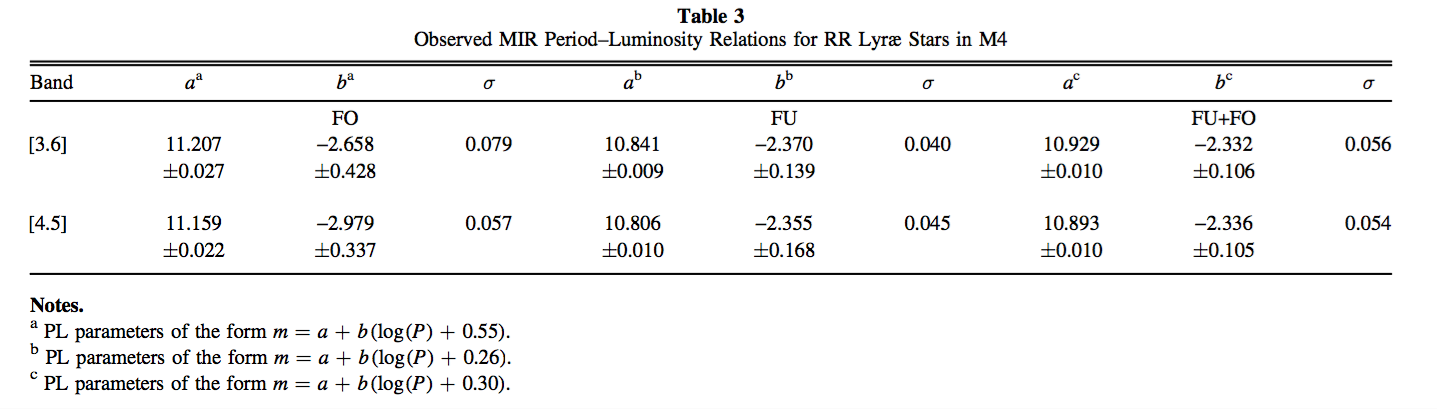

In [19]:
Image("neeley_m4_pls.png")

## Fitting the PL relations using the M4 slopes and MCMC fitting

* Following the procedure set out in Hogg, Bovy & Lang (2010) to marginalise over 'bad' outliers


In [145]:
### Analysing 3.6, allowing dispersion as a free parameter

x = analysis_df.logP_f
y = analysis_df.M_3p6
dy = analysis_df.e_M_3p6


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

In [140]:
def single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad):   
    return np.array(((1 - Pbad) / np.sqrt(2.*np.pi*yvar) * np.exp(-0.5 * (y - m*x - b)**2 / yvar) +
            Pbad / np.sqrt(2.*np.pi * Vbad) * np.exp(-0.5 * (y - Ybad)**2 / Vbad)))

def likelihood(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.prod(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

    
    
def prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    return np.array((Pbad >= 0) * (Pbad < 1) * (Vbad > 0))

def posterior(params, x, y, yerr):
    post = likelihood(params, x, y, yerr) * prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post

def ln_like(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.sum(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

def ln_prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    if (Pbad >= 0) and (Pbad < 1) and (Vbad > 0) and m > -10 and m < 10 and b < 10000 and b > -10000:
        return 0
    return -np.inf

def ln_posterior(params, x, y, yerr):
    post = ln_like(params, x, y, yerr) + ln_prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post

In [141]:
## if fixed_slope=True then set the slopeval to the correct value, mscale to the fixed slope uncertainty.
## bscale should be set to the median uncertainty on the absolute magnitude for the sample.

def pick_new_parameters(nsteps, params, fixed_slope=False, slopeval=np.nan, mscale=np.nan, bscale=0.1):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points
    if (fixed_slope == False):
        mscale = 0.1 ## from m4 paper

    
    if (fixed_slope == True):
        if not np.isfinite(slopeval):
            print 'you must enter a fixed slope value for slopeval'
            return -np.inf
        if not np.isfinite(mscale):
            print 'you must enter a fixed slope uncertinty value for mscale'
            return -np.inf
        m = slopeval

    # burn-in slope and intercept
    if nsteps > 10000:
        pbadscale = 0.1
        ybadscale = bscale
        vbadscale = 10.
    else:
        pbadscale = 0
        ybadscale = 0
        vbadscale = 0
    newb = b + bscale * np.random.normal()
    newm = m + mscale * np.random.normal()
    newPbad = Pbad + pbadscale * np.random.normal()
    newYbad = Ybad + ybadscale * np.random.normal()
    newVbad = Vbad + vbadscale * np.random.normal()
    newparams = np.array([newb, newm, newPbad, newYbad, newVbad])
    return (newparams)


In [146]:
np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.332, mscale=0.106, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        



[-0.91772569 -1.50341237  0.5        -0.75536148  0.53536299]
starting p =  5.40894969839e-17
Doing  10000 steps of MCMC...
1 0 0.0 5.40894969839e-17 5.40894969839e-17 [-0.91772569 -1.50341237  0.5        -0.75536148  0.53536299]
5001 3342 0.668266346731 2.54146089593e-17 6.93707089451e-17 [-1.04097517 -2.11150536  0.5        -0.75536148  0.53536299]
acceptance fraction 0.6754


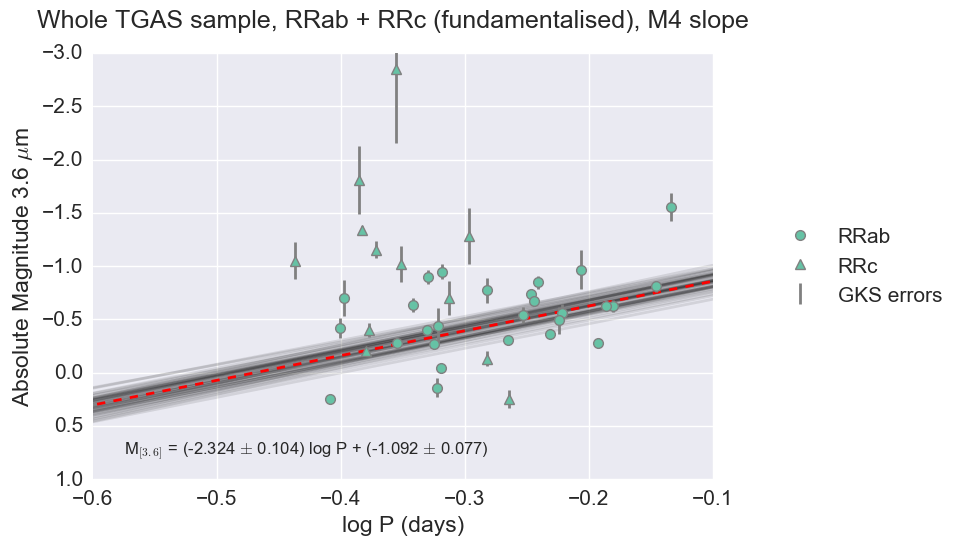

In [147]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)

mp.errorbar(analysis_df.logP_f, analysis_df.M_3p6, yerr = analysis_df.e_M_3p6, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_3p6'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
mp.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_3p6'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -3.0)


plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 50 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:50]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, 'r--')

mp.ylabel('Absolute Magnitude 3.6 $\mu$m')
mp.xlabel('log P (days)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRab + RRc (fundamentalised), M4 slope')

plot_text = 'M$_{4}$ = ({0:.3f} $\pm$ {1:.3f}) log P + ({2:.3f} $\pm$ {3:.3f})'.format(best_m, np.std(ms), best_b, np.std(bs), '{[3.6]}')
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_3p6_m4slope_mcmc_rrab_rrc.pdf')


[-0.94171597 -1.54879862  0.5        -0.76943648  0.5365355 ]
starting p =  5.60436683553e-17
Doing  10000 steps of MCMC...
1 0 0.0 5.60436683553e-17 5.60436683553e-17 [-0.94171597 -1.54879862  0.5        -0.76943648  0.5365355 ]
5001 3352 0.670265946811 2.51508128411e-17 6.82575240965e-17 [-1.04066544 -2.04706887  0.5        -0.76943648  0.5365355 ]
acceptance fraction 0.6765


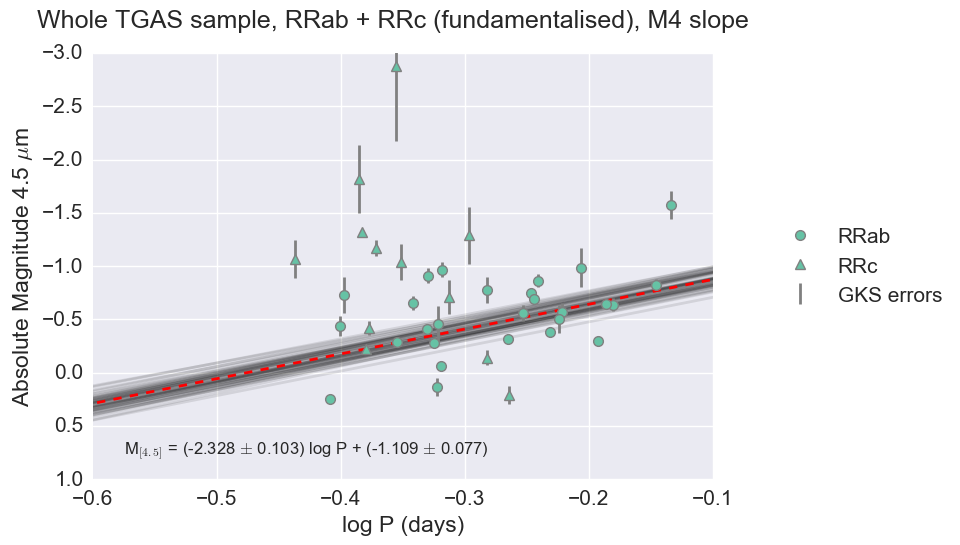

In [148]:
### Analysing 4.5

x = analysis_df.logP_f
y = analysis_df.M_4p5
dy = analysis_df.e_M_4p5


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.336, mscale=0.105, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)

mp.errorbar(analysis_df.logP_f, analysis_df.M_4p5, yerr = analysis_df.e_M_4p5, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(analysis_df.ix[analysis_df.Type=='ab', 'logP_f'], analysis_df.ix[analysis_df.Type=='ab', 'M_4p5'], 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')
mp.plot(analysis_df.ix[analysis_df.Type=='c', 'logP_f'], analysis_df.ix[analysis_df.Type=='c', 'M_4p5'], '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -3.0)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 50 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:50]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, 'r--')

mp.ylabel('Absolute Magnitude 4.5 $\mu$m')
mp.xlabel('log P (days)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRab + RRc (fundamentalised), M4 slope')

plot_text = 'M$_{4}$ = ({0:.3f} $\pm$ {1:.3f}) log P + ({2:.3f} $\pm$ {3:.3f})'.format(best_m, np.std(ms), best_b, np.std(bs), '{[4.5]}')
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_4p5_m4slope_mcmc_rrab_rrc.pdf')


[-1.20965301 -2.7302762   0.5        -0.66100406  0.46082685]
starting p =  4.45265917594e-10
Doing  10000 steps of MCMC...
1 1 1.0 3.18496024148e-10 4.45265917594e-10 [-1.20965301 -2.7302762   0.5        -0.66100406  0.46082685]
5001 3578 0.715456908618 1.80152687198e-10 4.53243765239e-10 [-1.19064574 -2.76329603  0.5        -0.66100406  0.46082685]
acceptance fraction 0.7181


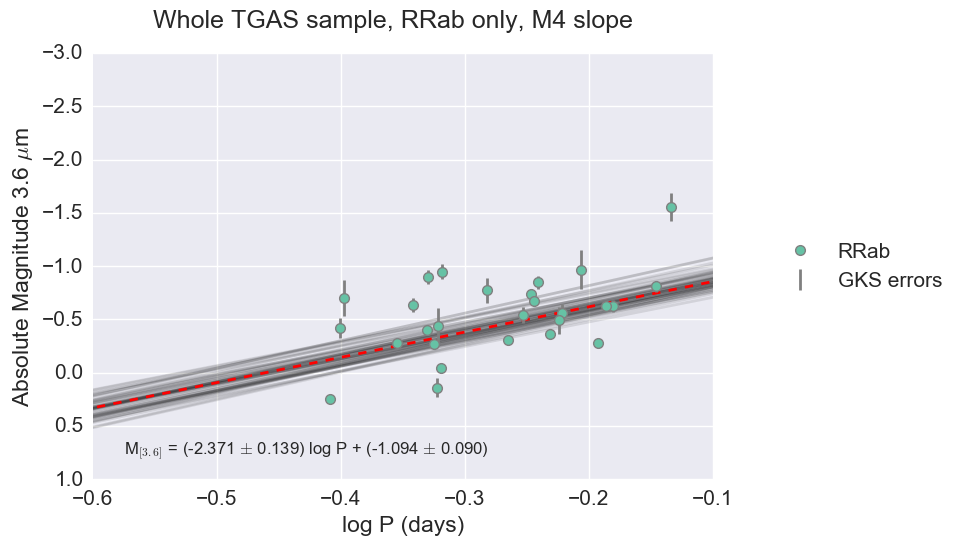

In [151]:
### Analysing 3.6, RRab only

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

x = ab_df.log_P
y = ab_df.M_3p6
dy = ab_df.e_M_3p6


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.370, mscale=0.139, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)


mp.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -3.0)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 50 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:50]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, 'r--')

mp.ylabel('Absolute Magnitude 3.6 $\mu$m')
mp.xlabel('log P (days)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRab only, M4 slope')

plot_text = 'M$_{4}$ = ({0:.3f} $\pm$ {1:.3f}) log P + ({2:.3f} $\pm$ {3:.3f})'.format(best_m, np.std(ms), best_b, np.std(bs), '{[3.6]}')
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_3p6_m4slope_mcmc_rrab_only.pdf')


[-1.23293632 -2.77372857  0.5        -0.67546834  0.46440782]
starting p =  4.19934423584e-10
Doing  10000 steps of MCMC...
1 1 1.0 2.50547083061e-10 4.19934423584e-10 [-1.23293632 -2.77372857  0.5        -0.67546834  0.46440782]
5001 3481 0.696060787842 1.53799826289e-10 4.24281790656e-10 [-1.21975876 -2.75649521  0.5        -0.67546834  0.46440782]
acceptance fraction 0.6984


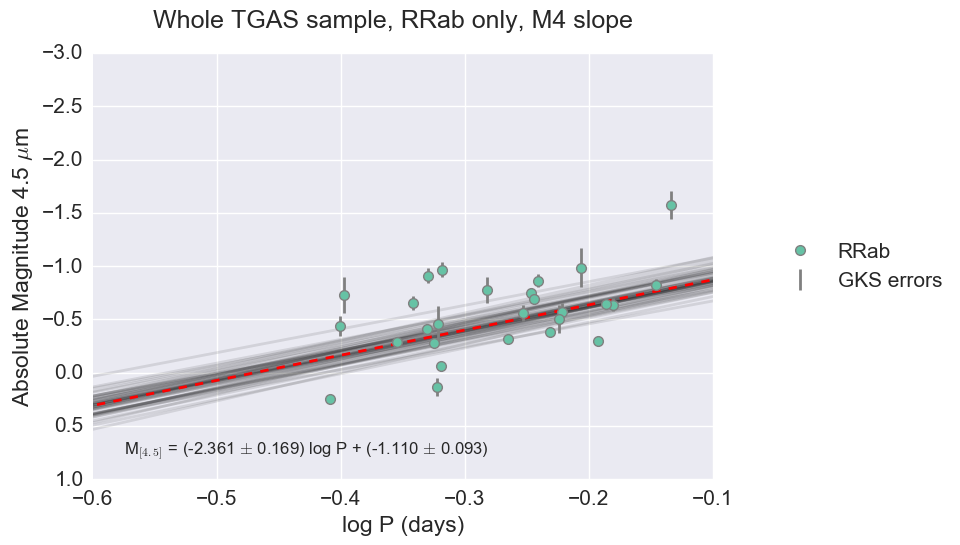

In [152]:
### Analysing 4.5, RRab only

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

x = ab_df.log_P
y = ab_df.M_4p5
dy = ab_df.e_M_4p5


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.355, mscale=0.168, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)


mp.errorbar(ab_df.log_P, ab_df.M_4p5, yerr = ab_df.e_M_4p5, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(ab_df.log_P, ab_df.M_4p5, 'o', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -3.0)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 50 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:50]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, 'r--')

mp.ylabel('Absolute Magnitude 4.5 $\mu$m')
mp.xlabel('log P (days)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRab only, M4 slope')

plot_text = 'M$_{4}$ = ({0:.3f} $\pm$ {1:.3f}) log P + ({2:.3f} $\pm$ {3:.3f})'.format(best_m, np.std(ms), best_b, np.std(bs), '{[4.5]}')
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_4p5_m4slope_mcmc_rrab_only.pdf')


[ 2.14548276  5.39300543  0.5        -0.97552882  0.64003258]
starting p =  8.72603855382e-07
Doing  10000 steps of MCMC...
1 0 0.0 8.72603855382e-07 8.72603855382e-07 [ 2.14548276  5.39300543  0.5        -0.97552882  0.64003258]
5001 1735 0.346930613877 1.12984211854e-07 8.72603855382e-07 [ 2.14548276  5.39300543  0.5        -0.97552882  0.64003258]
acceptance fraction 0.4737


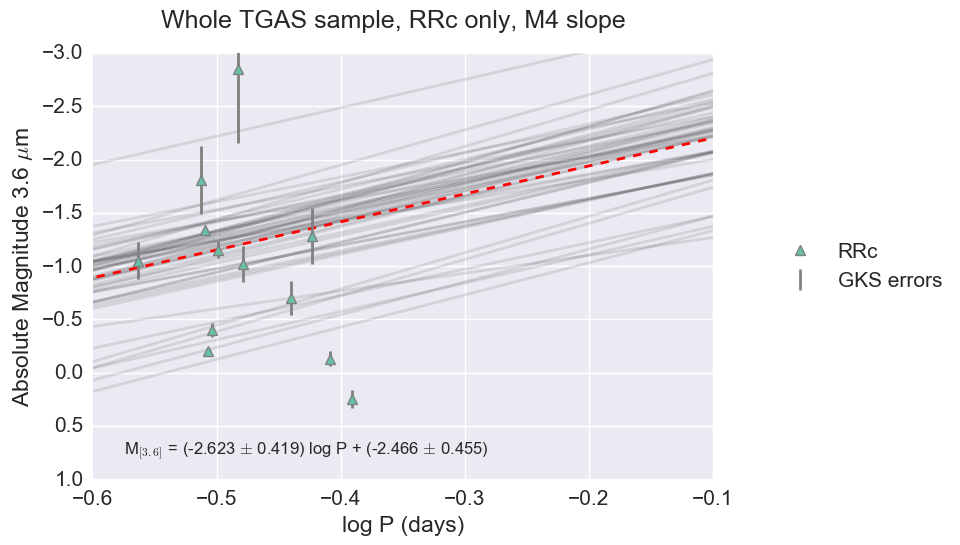

In [156]:
### Analysing 3.6, RRc only

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

x = c_df.log_P
y = c_df.M_3p6
dy = c_df.e_M_3p6


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.658, mscale=0.428, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)


mp.errorbar(c_df.log_P, c_df.M_3p6, yerr = c_df.e_M_3p6, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(c_df.log_P, c_df.M_3p6, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -3.0)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 50 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:50]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, 'r--')

mp.ylabel('Absolute Magnitude 3.6 $\mu$m')
mp.xlabel('log P (days)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRc only, M4 slope')

plot_text = 'M$_{4}$ = ({0:.3f} $\pm$ {1:.3f}) log P + ({2:.3f} $\pm$ {3:.3f})'.format(best_m, np.std(ms), best_b, np.std(bs), '{[3.6]}')
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_3p6_m4slope_mcmc_rrc_only.pdf')


[ 2.05676203  5.23023015  0.5        -0.98869548  0.63615554]
starting p =  9.38222890436e-07
Doing  10000 steps of MCMC...
1 0 0.0 9.38222890436e-07 9.38222890436e-07 [ 2.05676203  5.23023015  0.5        -0.98869548  0.63615554]
5001 1782 0.356328734253 9.93982823125e-08 9.38222890436e-07 [ 2.05676203  5.23023015  0.5        -0.98869548  0.63615554]
acceptance fraction 0.5031


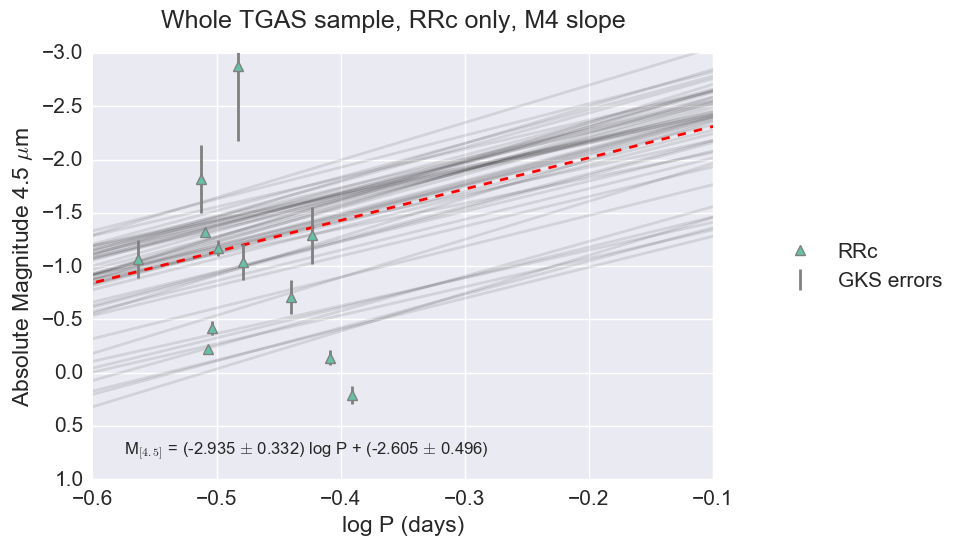

In [157]:
### Analysing 4.5, RRc only

c_df = analysis_df.where(analysis_df.Type=='c').dropna(axis=0, how='all')
c_df = c_df.reset_index(drop=True)

x = c_df.log_P
y = c_df.M_4p5
dy = c_df.e_M_4p5


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.979, mscale=0.337, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)


mp.errorbar(c_df.log_P, c_df.M_4p5, yerr = c_df.e_M_4p5, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(c_df.log_P, c_df.M_4p5, '^', color=col, ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRc')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -3.0)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 50 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:50]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, 'r--')

mp.ylabel('Absolute Magnitude 4.5 $\mu$m')
mp.xlabel('log P (days)')
mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRc only, M4 slope')

plot_text = 'M$_{4}$ = ({0:.3f} $\pm$ {1:.3f}) log P + ({2:.3f} $\pm$ {3:.3f})'.format(best_m, np.std(ms), best_b, np.std(bs), '{[4.5]}')
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_4p5_m4slope_mcmc_rrc_only.pdf')


[-1.20965301 -2.7302762   0.5        -0.66100406  0.46082685]
starting p =  4.45265917594e-10
Doing  10000 steps of MCMC...
1 1 1.0 3.18496024148e-10 4.45265917594e-10 [-1.20965301 -2.7302762   0.5        -0.66100406  0.46082685]
5001 3578 0.715456908618 1.80152687198e-10 4.53243765239e-10 [-1.19064574 -2.76329603  0.5        -0.66100406  0.46082685]
acceptance fraction 0.7181


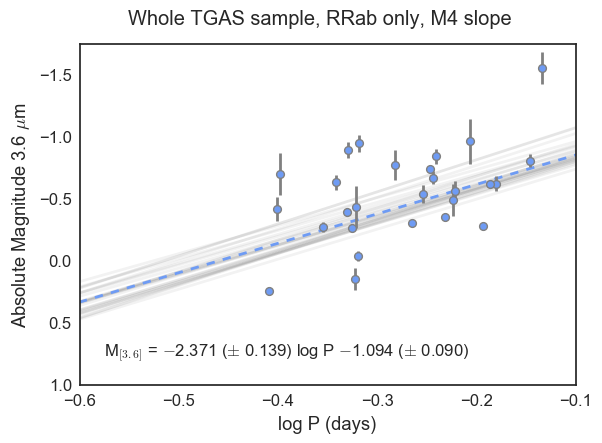

In [186]:
### Analysing 3.6, RRab only

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

x = ab_df.log_P
y = ab_df.M_3p6
dy = ab_df.e_M_3p6


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.370, mscale=0.139, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set_style("white")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("husl", 10)

colors = sns.color_palette()

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)


mp.errorbar(ab_df.log_P, ab_df.M_3p6, yerr = ab_df.e_M_3p6, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(ab_df.log_P, ab_df.M_3p6, 'o', color=colors[7], ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -1.75)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 25 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:25]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.05)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, color=colors[7], ls='--')

mp.ylabel('Absolute Magnitude 3.6 $\mu$m')
mp.xlabel('log P (days)')
#mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRab only, M4 slope')

if best_b < 0: 
    bsign = '-' 
else:
    bsign = '+'
if best_m < 0:
    msign = '-'
else:
    msign = ''
    

plot_text = 'M$_{4}$ = ${5}${0:.3f} ($\pm$ {1:.3f}) log P ${6}${2:.3f} ($\pm$ {3:.3f})'.format(np.abs(best_m), np.std(ms), np.abs(best_b), np.std(bs), '{[3.6]}', msign, bsign)
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_3p6_m4slope_mcmc_rrab_only_paper.pdf')


[-1.23293632 -2.77372857  0.5        -0.67546834  0.46440782]
starting p =  4.19934423584e-10
Doing  10000 steps of MCMC...
1 1 1.0 2.50547083061e-10 4.19934423584e-10 [-1.23293632 -2.77372857  0.5        -0.67546834  0.46440782]
5001 3481 0.696060787842 1.53799826289e-10 4.24281790656e-10 [-1.21975876 -2.75649521  0.5        -0.67546834  0.46440782]
acceptance fraction 0.6984


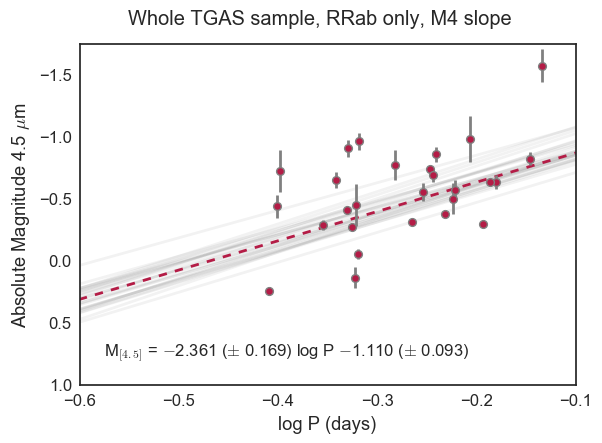

In [187]:
### Analysing 4.5, RRab only

ab_df = analysis_df.where(analysis_df.Type=='ab').dropna(axis=0, how='all')
ab_df = ab_df.reset_index(drop=True)

x = ab_df.log_P
y = ab_df.M_4p5
dy = ab_df.e_M_4p5


A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(dy*dy)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

print params

p = posterior(params, x, y, dy)
print 'starting p = ', p

chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

bscale = np.median(dy)

print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams, fixed_slope=True, slopeval=-2.355, mscale=0.168, bscale=bscale)
    p = posterior(newparams, x, y, dy)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

sns.set_style("white")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette(sns.husl_palette(10, l=.4))

colors = sns.color_palette()

xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)


mp.errorbar(ab_df.log_P, ab_df.M_4p5, yerr = ab_df.e_M_4p5, ls='None',zorder=4, color='Grey', label='GKS errors')
mp.plot(ab_df.log_P, ab_df.M_4p5, 'o', color=colors[0], ls='None', zorder=4, markeredgecolor='Grey', markeredgewidth=1, label='RRab')

#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -1.75)


xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 25 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:25]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.05)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


best_m = np.median(ms)
best_b = np.median(bs)

mp.plot(xfit, best_m*xfit + best_b, color=colors[0], ls='--')

mp.ylabel('Absolute Magnitude 4.5 $\mu$m')
mp.xlabel('log P (days)')
#mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.suptitle('Whole TGAS sample, RRab only, M4 slope')

if best_b < 0: 
    bsign = '-' 
else:
    bsign = '+'
if best_m < 0:
    msign = '-'
else:
    msign = ''
    

plot_text = 'M$_{4}$ = ${5}${0:.3f} ($\pm$ {1:.3f}) log P ${6}${2:.3f} ($\pm$ {3:.3f})'.format(np.abs(best_m), np.std(ms), np.abs(best_b), np.std(bs), '{[4.5]}', msign, bsign)
mp.annotate(plot_text, xy=(-0.575, 0.75), xycoords='data', size=12)

mp.savefig('tgas_4p5_m4slope_mcmc_rrab_only_paper.pdf')


In [173]:
col = colors[4]

In [174]:
col

(0.20125317221201128, 0.6907920815379025, 0.47966761189275336)